In [ ]:
import hashlib
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# load the dataset
df = pd.read_csv('/content/ecg_data_t.csv')
x_data = df['Time'][:3000].values
y_data = df['DATA'][:3000].values
dataset = df.astype('float32')
print('Original Data\n',y_data)

Original Data
 [347 348 349 ... 349 349 347]


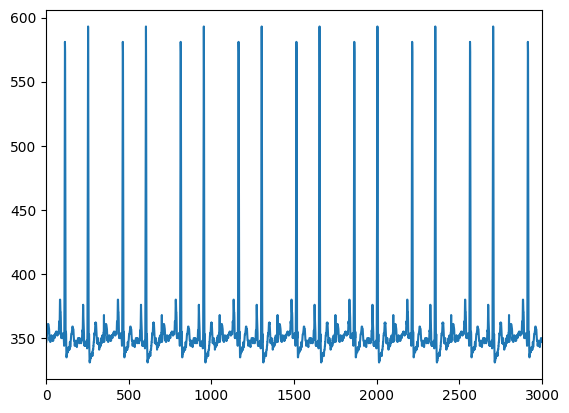

In [ ]:
# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_data_normalized = scaler_x.fit_transform(x_data.reshape(-1,1))
y_data_normalized = scaler_y.fit_transform(y_data.reshape(-1, 1)).ravel()

plt.plot(x_data , y_data)
plt.xlim(0,3000)
plt.show()

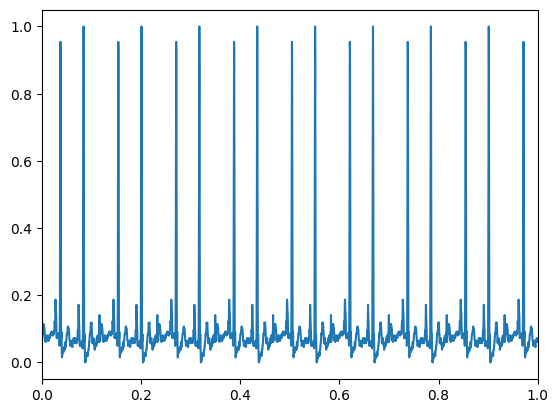

In [ ]:
plt.plot(x_data_normalized , y_data_normalized)
plt.xlim(0,1)
plt.show()

In [ ]:
def hermite_forward(x):
    y = x+2
    return y
def reverse_hermite(y):
    x = y-2
    return x

In [ ]:

import random

def embed_algorithm(cover_block):
    stego_block = []
    secret_bit = []
    i=0
    j=0
    print("Secret bit: ",end="")
    for yi in cover_block:

        yi = hermite_forward(yi)

        if j % 4 == 0:
            b1 = random.randint(0,1)
            b2 = random.randint(0,1)
            print(str(b1)+str(b2),end=" ")
        j+=1

        secret_bit.append(str(b1)+' '+str(b2))

        Y1 = round(yi, 3)
        y1 = str(Y1)
        y1=y1[:4]
        Y2 = float(y1)
        Sn = np.sign(Y1)
        p = int((Y1 * 1e3) % 10)
        p1 = round(p / 2)
        p2 = p - p1 + 1

        if b1 == 0 and b2 == 0:
            yadd = 0.0
            yfix = p
        else:
            yadd = p2 * ((b1 * 10) + b2)
            yfix = p1

        tilde_yi = Sn * ((Y2) + (yfix * 1e-3) + (yadd * 1e-5))
        tilde_yi=reverse_hermite(tilde_yi)
        stego_block.append(round(tilde_yi,5))

    print('Stego Blocks',stego_block)
    #print('Secret Bit',secret_bit)
    return stego_block

In [ ]:
def generate_hash(data):
    hash_object = hashlib.sha256(str(data).encode())
    return hash_object.hexdigest()

In [ ]:
dataset = y_data
dataset = dataset.astype('float32')

In [ ]:
cover_block = dataset
ste = embed_algorithm(cover_block)
hashes = [generate_hash(ste[i] + ste[i + 1]) for i in range(len(ste) - 1)]
print("Passwords:", hashes)
f = open('Data.txt','w')
ste_str = ''
for i in ste:
    ste_str = ste_str + str(i) +' '
f.write(ste_str)
f.close()
f1 = open('Password.txt','w')
pass_str=''
for i in hashes:
    pass_str = pass_str + str(i) +' '
f1.write(pass_str)
f1.close()


Secret bit: 01 01 11 10 11 01 01 01 11 00 00 01 11 10 01 00 00 11 11 01 01 10 01 11 10 01 10 01 10 10 11 01 01 11 11 01 10 01 00 01 00 01 01 00 10 11 10 01 10 00 01 10 10 10 11 10 11 01 00 11 01 11 01 01 11 01 11 00 11 11 10 10 01 11 00 00 00 11 00 01 10 00 11 00 00 01 01 01 01 10 01 10 10 11 10 10 11 11 00 00 11 00 00 00 01 11 11 00 01 00 11 11 01 00 11 10 01 00 10 10 01 00 00 10 10 00 00 01 00 01 01 01 11 01 10 10 10 10 00 01 00 01 01 11 11 11 00 00 01 11 11 11 10 11 00 00 10 00 00 01 01 00 01 10 00 01 10 01 11 01 11 01 10 10 11 00 10 10 00 00 01 01 01 01 10 11 10 01 01 11 01 10 00 11 11 10 00 11 01 00 10 00 10 11 01 11 11 10 10 11 01 00 11 10 01 01 11 11 01 10 10 00 10 10 00 00 10 01 01 10 11 00 00 01 00 10 10 01 01 00 11 11 10 00 10 01 00 10 00 01 01 01 00 00 10 11 11 01 00 11 01 00 11 10 01 00 00 01 11 11 10 10 11 10 00 11 11 01 01 11 11 01 11 11 00 00 10 00 10 00 11 11 10 10 10 00 11 01 11 10 00 01 10 00 01 01 11 01 01 11 10 10 00 10 10 11 11 00 01 00 00 01 10 00 11 00 00 10 00 0

In [ ]:
def generate_hash(data):
    hash_object = hashlib.sha256(str(data).encode())
    return hash_object.hexdigest()


In [ ]:
from keras.models import load_model
MLP = load_model("/content/mlp.h5")

In [ ]:

def reconstruction_algorithm(stego_block):

    reconstructed_block = []
    exect = []
    for yi in stego_block:
        yi = hermite_forward(yi)
        Z1 = round(yi, 5)
        z1 = str(Z1)
        z1 = z1[:4]
        Z2 = float(z1)
        Sn = np.sign(Z1)
        yfix = int((Z1 * 1e3) % 10)
        q2 = int((Z1 * 1e4) % 10)
        q3 = int((Z1 * 1e5) % 10)

        if ((q2 == 0) and (q3 == 0)):
            b1, b2 = 0, 0
        else:
            qn = int(((q2 * 10) + q3) / 11)
            if (((q2 * 10) + q3) % 11) == 0:
                b1, b2 = 1, 1
            elif (((q2 * 10) + q3) % 10 )== 0:
                b1, b2 = 1, 0
            elif (((q2 * 10) + q3) % 1) == 0:
                b1, b2 = 0, 1
            yfix = yfix + qn - 1
        exect.append(str(b1)+' '+str(b2))
        hat_yi = Sn * (Z2 + (yfix * 1e-3))
        hat_yi=reverse_hermite(hat_yi)
        hat_yi = round(hat_yi,3)
        reconstructed_block.append(hat_yi)

    print('Recovered Block',reconstructed_block)
    print('Extracted bit',exect)
    return reconstructed_block

In [ ]:
f = open('Data.txt','r')
ste_str = f.read()
ste_str = ste_str.split()
ste = []
for i in ste_str:
    ste.append(float(i))
f.close()
print('Received data',ste)

f1 = open('Password.txt','r')
pass_str = f1.read()
generated_hash = pass_str.split()
f1.close()
print('Received hash',generated_hash)

# Example usage:
received_data_stream = ste
j=0

pos=[]
# Generate hashes for each pair of consecutive received data
received_hashes = [generate_hash(received_data_stream[i] + received_data_stream[i + 1]) for i in range(len(received_data_stream) - 1)]
print('Password for Received Stego Data',received_hashes)
# Compare the generated hashes with received hashes

rh = 0
pos.append(rh)
for rh in range(len(generated_hash)):
  if generated_hash[rh] in received_hashes:
    pos.append(rh+1)

for rh in range(len(generated_hash)):
  if rh in pos:
    continue
  else:
    print('Position of missed data',rh)
vr_data=[]

n = len(generated_hash)+1

j=0
flg=0
for i in range(n):
  if i in pos:
    vr_data.append(ste[j])
    j=j+1
  else:
    flg=1
    position = np.array([[i]])
    position_normalized = scaler_x.transform(position)
    data_pred_normalized = MLP.predict(position_normalized)[0, 0]
    data_pred = scaler_y.inverse_transform([[data_pred_normalized]])[0, 0]
    vr_data.append(data_pred)
    print('Predicted data at position : ',data_pred)
if flg==0:
  print('No tampered')
else:
  print('Tampered and Reconstructed')
rec = reconstruction_algorithm(vr_data)

Received data [347.00001, 348.00001, 349.00001, 350.00001, 353.00001, 353.00001, 354.00001, 355.00001, 357.00011, 360.00011, 361.00011, 361.00011, 361.0001, 360.0001, 360.0001, 359.0001, 358.00011, 357.00011, 354.00011, 350.00011, 348.00001, 350.00001, 351.00001, 349.00001, 347.00001, 347.00001, 349.00001, 350.00001, 351.00001, 352.00001, 350.00001, 351.00001, 352.00011, 350.00011, 350.00011, 351.00011, 350.0, 348.0, 348.0, 349.0, 349.0, 349.0, 348.0, 350.0, 352.00001, 352.00001, 351.00001, 351.00001, 352.00011, 351.00011, 350.00011, 351.00011, 353.0001, 353.0001, 353.0001, 353.0001, 354.00001, 354.00001, 354.00001, 355.00001, 354.0, 355.0, 355.0, 354.0, 353.0, 353.0, 352.0, 352.0, 353.00011, 354.00011, 353.00011, 354.00011, 355.00011, 353.00011, 353.00011, 353.00011, 355.00001, 359.00001, 363.00001, 362.00001, 361.00001, 361.00001, 370.00001, 380.00001, 380.0001, 373.0001, 370.0001, 370.0001, 366.00001, 357.00001, 351.00001, 350.00001, 352.00011, 353.00011, 351.00011, 350.00011, 352.0

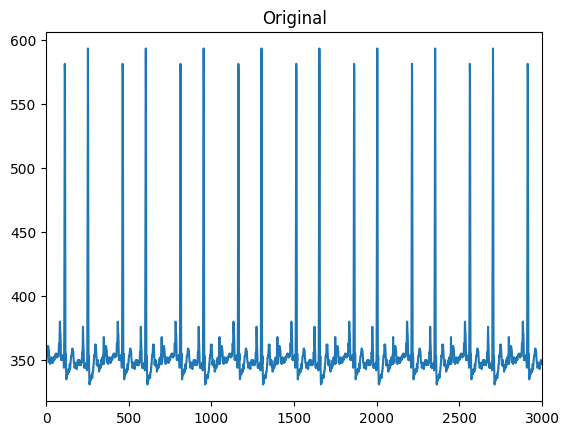

In [ ]:
plt.plot(cover_block)
plt.title('Original')
plt.xlim(0,3000)
plt.show()


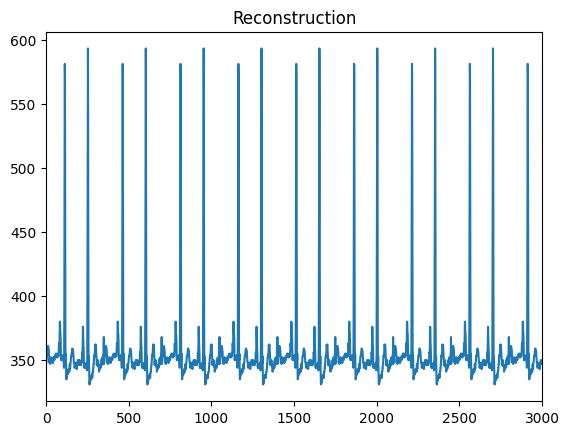

In [ ]:
plt.plot(rec)
plt.title('Reconstruction')
plt.xlim(0,3000)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_psnr(y_true, y_pred, max_value=255):
    rmse = calculate_rmse(y_true, y_pred)
    print('RMSE value : ',rmse)
    psnr = 20 * math.log10(max_value / rmse)
    return psnr

# Extract 'P' and 'Q' columns

#P_values = cover_block
P_values = ste

Q_values = rec


# Calculate PSNR
psnr_value = calculate_psnr(P_values, Q_values)

print(f"PSNR value : {psnr_value} dB")

RMSE value :  0.0005325718730574789
PSNR value : 113.60323908605332 dB


In [ ]:

def calculate_prd(predictions, targets):
    # Calculate the squared differences between predictions and targets
    squared_diff = (predictions - targets) ** 2

    # Calculate the sum of squared differences
    sum_squared_diff = np.sum(squared_diff)

    # Calculate the sum of squared predictions
    sum_squared_predictions = np.sum(predictions ** 2)

    # Calculate the PRD
    prd = np.sqrt(sum_squared_diff / sum_squared_predictions) * 100
    return prd

predictions = cover_block

targets = ste
#targets = rec

# Calculate the PRD
prd = calculate_prd(predictions, targets)
print("PRD:", prd)

PRD: 2.0836149064249746e-05


In [ ]:
# Visualization

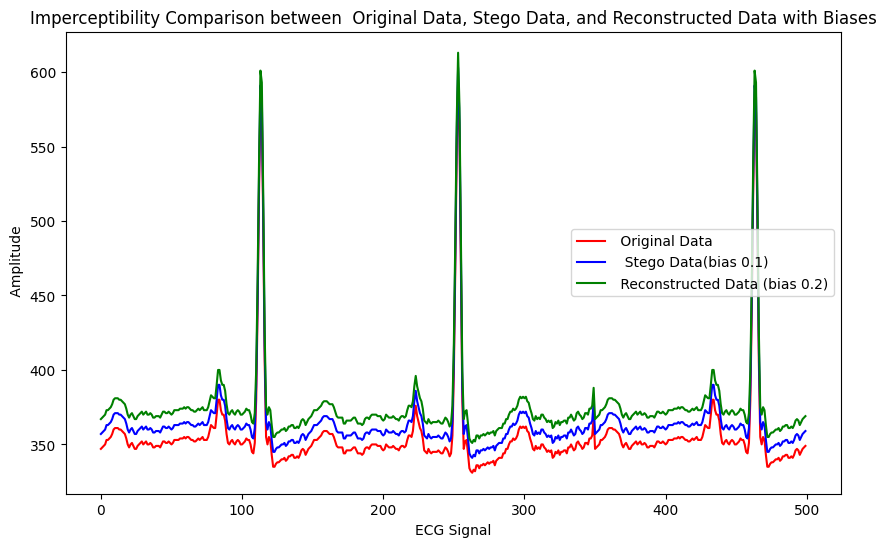

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mse(signal1, signal2):
    return np.mean((np.array(signal1) - np.array(signal2))**2)

# Assuming X, Y, Z are your signals as lists
X = cover_block[:500] # Replace with your actual signal data
Y = ste[:500]  # Replace with your actual signal data
Z = rec[:500]  # Replace with your actual signal data

# Apply biases
Y_biased = [y + 0.1*100 for y in Y]
Z_biased = [z + 0.2*100 for z in Z]

# Plot signals
plt.figure(figsize=(10, 6))

plt.plot(X, label=' Original Data', color='red')
plt.plot(Y_biased, label='  Stego Data(bias 0.1)', color='blue')
plt.plot(Z_biased, label=' Reconstructed Data (bias 0.2)', color='green')

# Highlight the MSE values
mse_XY = calculate_mse(X, Y_biased)
mse_XZ = calculate_mse(X, Z_biased)

plt.title('Imperceptibility Comparison between  Original Data, Stego Data, and Reconstructed Data with Biases')
plt.xlabel('ECG Signal')
plt.ylabel(' Amplitude')
plt.legend()
plt.show()


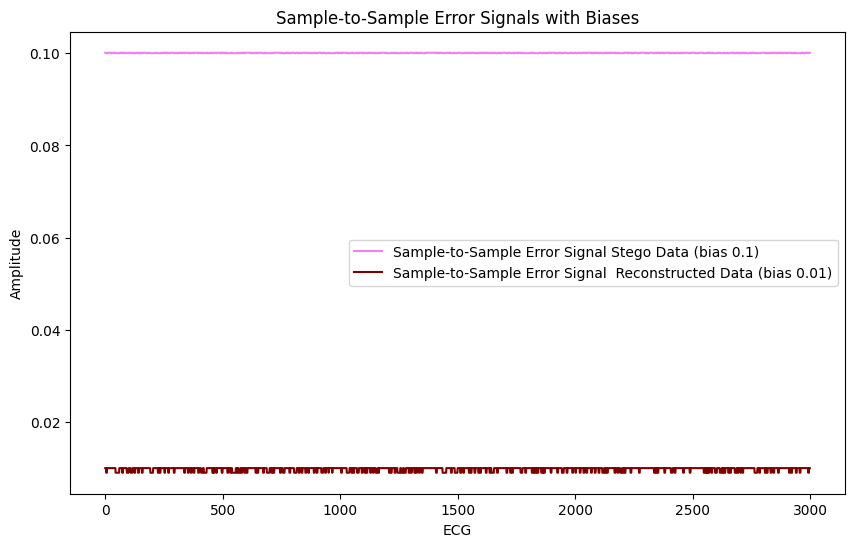

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, Y, Z are your signals as lists
X = cover_block[:15000] # Replace with your actual signal data
Y = ste[:15000]  # Replace with your actual signal data
Z = rec[:15000]# Replace with your actual signal data

# Apply biases
Y_biased = [y + 0.1 for y in Y]
Z_biased = [z + 0.01 for z in Z]

# Calculate sample-to-sample error signals
error_signal_Y = [y - x for x, y in zip(X, Y_biased)]
error_signal_Z = [z - x for x, z in zip(X, Z_biased)]

# Plot error signals
plt.figure(figsize=(10, 6))

plt.plot(error_signal_Y, label='Sample-to-Sample Error Signal Stego Data (bias 0.1)', color='violet')
plt.plot(error_signal_Z, label='Sample-to-Sample Error Signal  Reconstructed Data (bias 0.01)', color='maroon')

plt.title('Sample-to-Sample Error Signals with Biases')
plt.xlabel('ECG')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


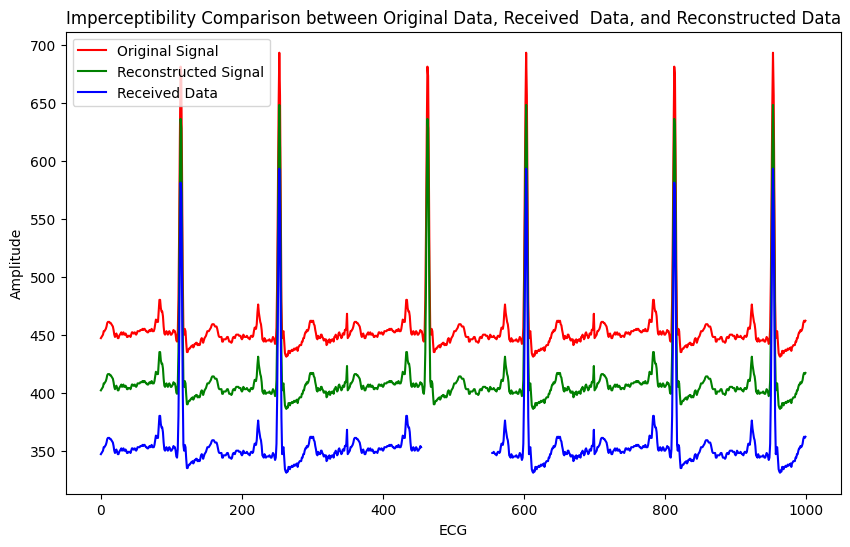

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, Y, Z are your signals as lists
X =  cover_block[:1000]# Replace with your actual signal data
Y = ste[:1000]   # Replace with your actual signal data, with NaN for the missing segment
Z = rec[:1000] # Replace with your actual signal data

for i in range(455, 455 + 100):
    if i < len(Y):
        Y[i] = np.nan
# Apply bias
Y_missing_bias_0_55 = [y + 0.75*100 if  np.isnan(y) else y for y in Y]
X1 = [x + 100 if not np.isnan(x) else x for x in X]
Z1 = [z + 0.55*100 if not np.isnan(z) else z for z in Z]
# Plot signals
plt.figure(figsize=(10, 6))

plt.plot(X1, label='Original Signal', color='red', linestyle='-')
plt.plot(Z1, label='Reconstructed Signal', color='green', linestyle='-')
plt.plot(Y_missing_bias_0_55, label='Received Data ', color='blue', linestyle='-')

plt.title('Imperceptibility Comparison between Original Data, Received  Data, and Reconstructed Data')
plt.xlabel('ECG')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
